<a href="https://colab.research.google.com/github/TotalySpies/Portfolio-for-Data-Analytics/blob/main/Exploratory_data_analysis_for_store.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Connecting Google Drive
from google.colab import drive
drive.mount("/content/drive")
# Changing work folder
%cd /content/drive/MyDrive/Mate_homework
# Uploading dataset
df_countries = pd.read_csv("countries.csv")
df_cities = pd.read_csv("events.csv")
df_sales = pd.read_csv("products.csv")
df_countries.rename(columns={'name': 'Country'}, inplace=True)
# print(df_countries.head())
# print(df_cities.head())
# print(df_sales.head())
# df_countries и df_cities
df_combined = pd.merge(df_countries, df_cities, left_on='alpha-3', right_on='Country Code', how="outer")
# соединяю с df_sales
df_combined = pd.merge(df_combined, df_sales, left_on='Product ID', right_on='id', how='inner')
print(df_combined.head())
# print(df_combined.columns)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Mate_homework
   Country alpha-2 alpha-3  region       sub-region     Order ID  Order Date  \
0  Albania      AL     ALB  Europe  Southern Europe  152191388.0   5/18/2012   
1  Albania      AL     ALB  Europe  Southern Europe  208238399.0   8/29/2015   
2  Albania      AL     ALB  Europe  Southern Europe  246922719.0   7/13/2015   
3  Albania      AL     ALB  Europe  Southern Europe  270358788.0  12/11/2014   
4  Albania      AL     ALB  Europe  Southern Europe  357930982.0   1/16/2016   

    Ship Date Order Priority Country Code  Product ID Sales Channel  \
0   6/22/2012              L          ALB      7331.0       Offline   
1  10/15/2015              L          ALB      8293.0       Offline   
2   7/29/2015              H          ALB      8681.0        Online   
3   1/24/2015              M          ALB      1270.0       Offline  

In [ ]:
print(df_combined.info())
print(df_combined.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         1248 non-null   object 
 1   alpha-2         1248 non-null   object 
 2   alpha-3         1248 non-null   object 
 3   region          1248 non-null   object 
 4   sub-region      1248 non-null   object 
 5   Order ID        1330 non-null   float64
 6   Order Date      1330 non-null   object 
 7   Ship Date       1330 non-null   object 
 8   Order Priority  1330 non-null   object 
 9   Country Code    1248 non-null   object 
 10  Product ID      1330 non-null   float64
 11  Sales Channel   1330 non-null   object 
 12  Units Sold      1328 non-null   float64
 13  Unit Price      1330 non-null   float64
 14  Unit Cost       1330 non-null   float64
 15  id              1330 non-null   int64  
 16  item_type       1330 non-null   object 
dtypes: float64(5), int64(1), object(1

In [ ]:
#перевірка на пусті значення
print(f"перевірка на пусті значення :{df_combined.isna().sum()}")
# у відсотках
print(df_combined.isna().sum() / df_combined.shape[0] * 100)

перевірка на пусті значення :Country           82
alpha-2           82
alpha-3           82
region            82
sub-region        82
Order ID           0
Order Date         0
Ship Date          0
Order Priority     0
Country Code      82
Product ID         0
Sales Channel      0
Units Sold         2
Unit Price         0
Unit Cost          0
id                 0
item_type          0
Profit             2
dtype: int64
Country           6.165414
alpha-2           6.165414
alpha-3           6.165414
region            6.165414
sub-region        6.165414
Order ID          0.000000
Order Date        0.000000
Ship Date         0.000000
Order Priority    0.000000
Country Code      6.165414
Product ID        0.000000
Sales Channel     0.000000
Units Sold        0.150376
Unit Price        0.000000
Unit Cost         0.000000
id                0.000000
item_type         0.000000
Profit            0.150376
dtype: float64


In [ ]:
#Заповнення пропущених значень
df_combined['Country Code'] = df_combined['Country Code'].fillna('Unknown')
df_clean = df_combined.dropna()

df_combined["Units Sold"] = df_combined["Units Sold"].fillna(df_combined["Units Sold"].mean())
df_combined['Unit Price'] = df_combined['Unit Price'].fillna(df_combined['Unit Price'].mean())
df_combined['Unit Cost'] = df_combined['Unit Cost'].fillna(df_combined['Unit Cost'].mean())

#меняем значения
df_combined["Order Date"] = pd.to_datetime(df_combined["Order Date"], errors='coerce')
df_combined["Ship Date"] = pd.to_datetime(df_combined["Ship Date"], errors='coerce')
print(df_combined.info())
df_combined.dropna(subset=['Order Date', 'Ship Date'], inplace=True)

#проверка дубликатов
df_combined._duplicate_rows = df_combined.duplicated()
print(df_combined._duplicate_rows )
print(df_combined._duplicate_rows .sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Country         1248 non-null   object        
 1   alpha-2         1248 non-null   object        
 2   alpha-3         1248 non-null   object        
 3   region          1248 non-null   object        
 4   sub-region      1248 non-null   object        
 5   Order ID        1330 non-null   float64       
 6   Order Date      1330 non-null   datetime64[ns]
 7   Ship Date       1330 non-null   datetime64[ns]
 8   Order Priority  1330 non-null   object        
 9   Country Code    1330 non-null   object        
 10  Product ID      1330 non-null   float64       
 11  Sales Channel   1330 non-null   object        
 12  Units Sold      1330 non-null   float64       
 13  Unit Price      1330 non-null   float64       
 14  Unit Cost       1330 non-null   float64       
 15  id  

<ipython-input-8-abea9adbc5ac>:16: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df_combined._duplicate_rows = df_combined.duplicated()


In [ ]:
# Calculate total sales and profit
Total_Units_Sold = df_combined["Units Sold"].sum()
Total_Unit_Price = df_combined['Unit Price'].sum()
Total_Unit_Cost = df_combined['Unit Cost'].sum()
print(f"Total Sold: ${Total_Units_Sold:.2f}")
print(f"Total Price: ${Total_Unit_Price:.2f}")
print(f"Total Cost: ${Total_Unit_Cost:.2f}")

df_combined['Profit'] = (df_combined['Unit Price'] - df_combined['Unit Cost']) * df_combined['Units Sold']
print(f"Total_Profit:{df_combined['Profit']}")

Total Sold: $6586428.40
Total Price: $352308.41
Total Cost: $249038.26
Total_Profit:0        543430.34
1        212816.88
2       1107843.75
3         63078.48
4        630555.84
           ...    
1325      10167.79
1326    1016587.82
1327     626060.21
1328     435155.09
1329      15332.42
Name: Profit, Length: 1330, dtype: float64


** Середні продажі **

Units Sold   Unit Price    Unit Cost  
4952.201807   264.893541   187.246812   


**Total Sold**: $6576524.00

**Total Price**: $352308.41

**Total Cost**: $249038.26




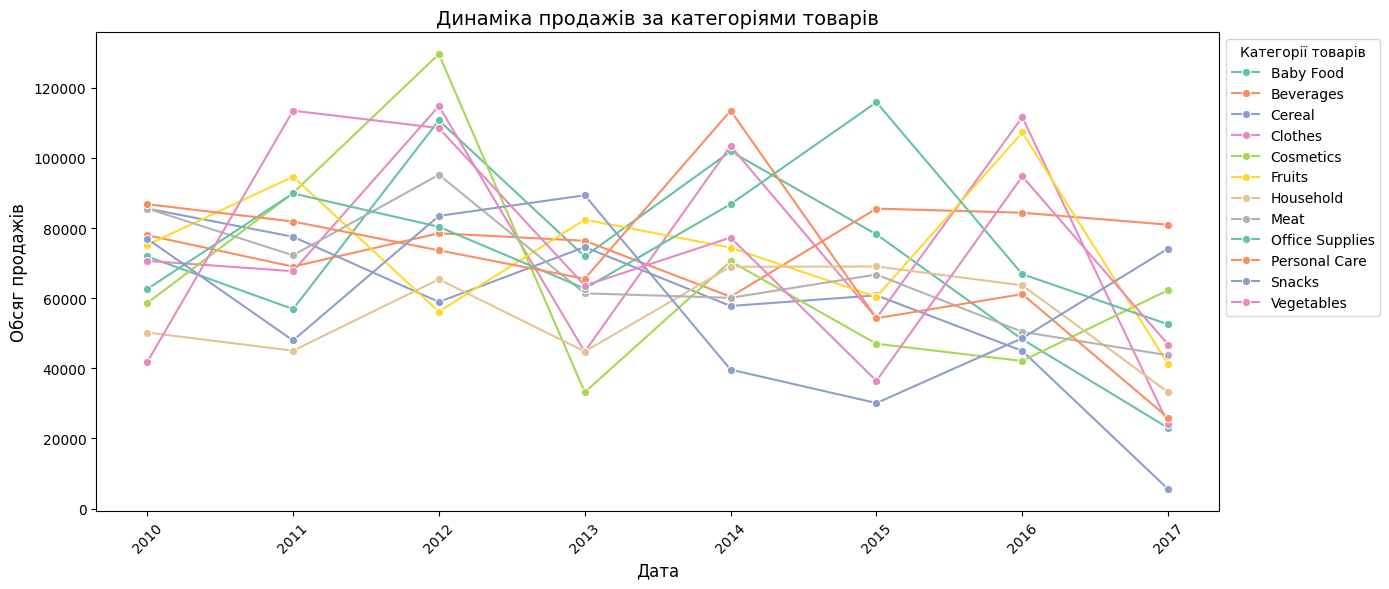

In [ ]:
# График 1: продажі за категоріями товарів
plt.figure(figsize=(14, 6))
sns.lineplot(data=sales_by_item_type, x='Year', y='Units Sold', hue='item_type', marker='o', palette="Set2")
plt.title("Динаміка продажів за категоріями товарів", fontsize=14)
plt.xlabel("Дата", fontsize=12)
plt.ylabel("Обсяг продажів", fontsize=12)
plt.xticks(rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title="Категорії товарів")
plt.tight_layout()
plt.show()


**Висновки:**

Vegetables та Cosmetics почали активно зростати с 2010 по 2012, далі пішли на спад та тримали середні показники.Після 2013 активно зростати почали Personal care, Baby Food, Clothes,Fruits.







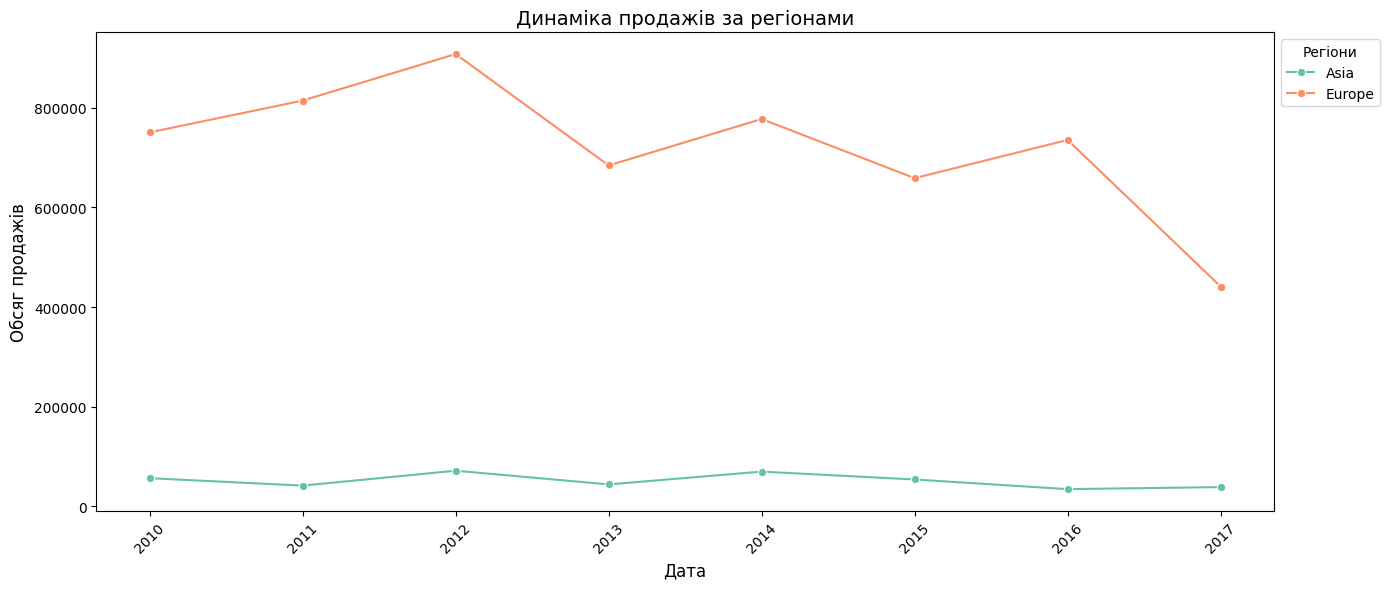

In [ ]:
# Графік 3: продажі за регіонами
plt.figure(figsize=(14, 6))
sns.lineplot(data=sales_by_region, x='Year', y='Units Sold', hue='region', marker='o', palette="Set2")
plt.title("Динаміка продажів за регіонами", fontsize=14)
plt.xlabel("Дата", fontsize=12)
plt.ylabel("Обсяг продажів", fontsize=12)
plt.xticks(rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title="Регіони")
plt.tight_layout()
plt.show()


**Висновок:**

Азія стабільні результати продаж протігом років.

Європа пішла на зростання ,2012 рік це пік продажів, далі був спад та римали стабільність,у 2017 року продажі впали до 500 000.

<ipython-input-23-2afbde6d296e>:12: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


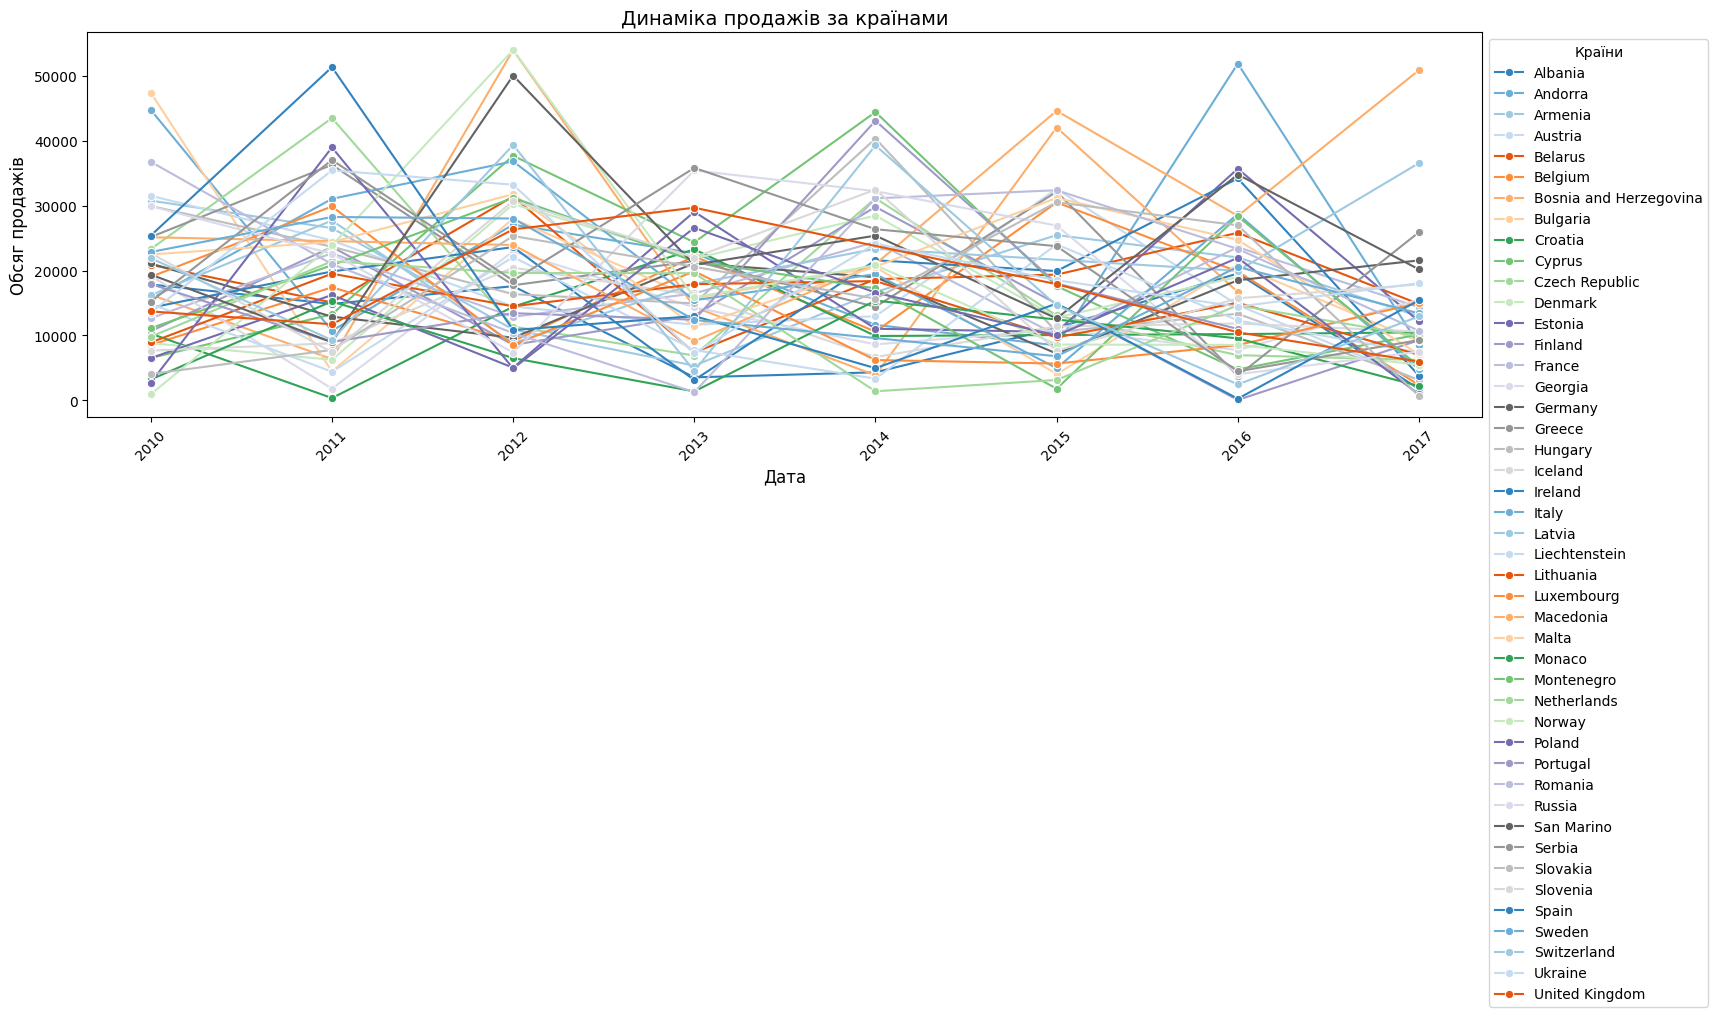

In [ ]:
# Графік 2: продажі за країнами
num_countries = len(sales_by_country['Country'].unique())
palette = sns.color_palette("tab20c", num_countries)  # "tab20c" - палитра с 20 цветами, вы можете выбрать другую

plt.figure(figsize=(18, 5))
sns.lineplot(data=sales_by_country, x='Year', y='Units Sold', hue='Country', marker='o', palette=palette)
plt.title("Динаміка продажів за країнами", fontsize=14)
plt.xlabel("Дата", fontsize=12)
plt.ylabel("Обсяг продажів", fontsize=12)
plt.xticks(rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title="Країни")
plt.tight_layout()
plt.show()


**Продажі за країнами**

Всі країни стабільни протігів років.
Є декілька великих скачків , 2012 рік це Денмарк, 2016 це Арменія, 2011 це Албанія

<ipython-input-14-1e05cccc8f0c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='item_type', y='Shipping Time', data=df_combined, palette="Set2", ax=axes[0])
<ipython-input-14-1e05cccc8f0c>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y='Shipping Time', data=df_combined, palette="Set2", ax=axes[1])
<ipython-input-14-1e05cccc8f0c>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='region', y='Shipping Time', data=df_combined, palette="Set2", ax=axes[2])


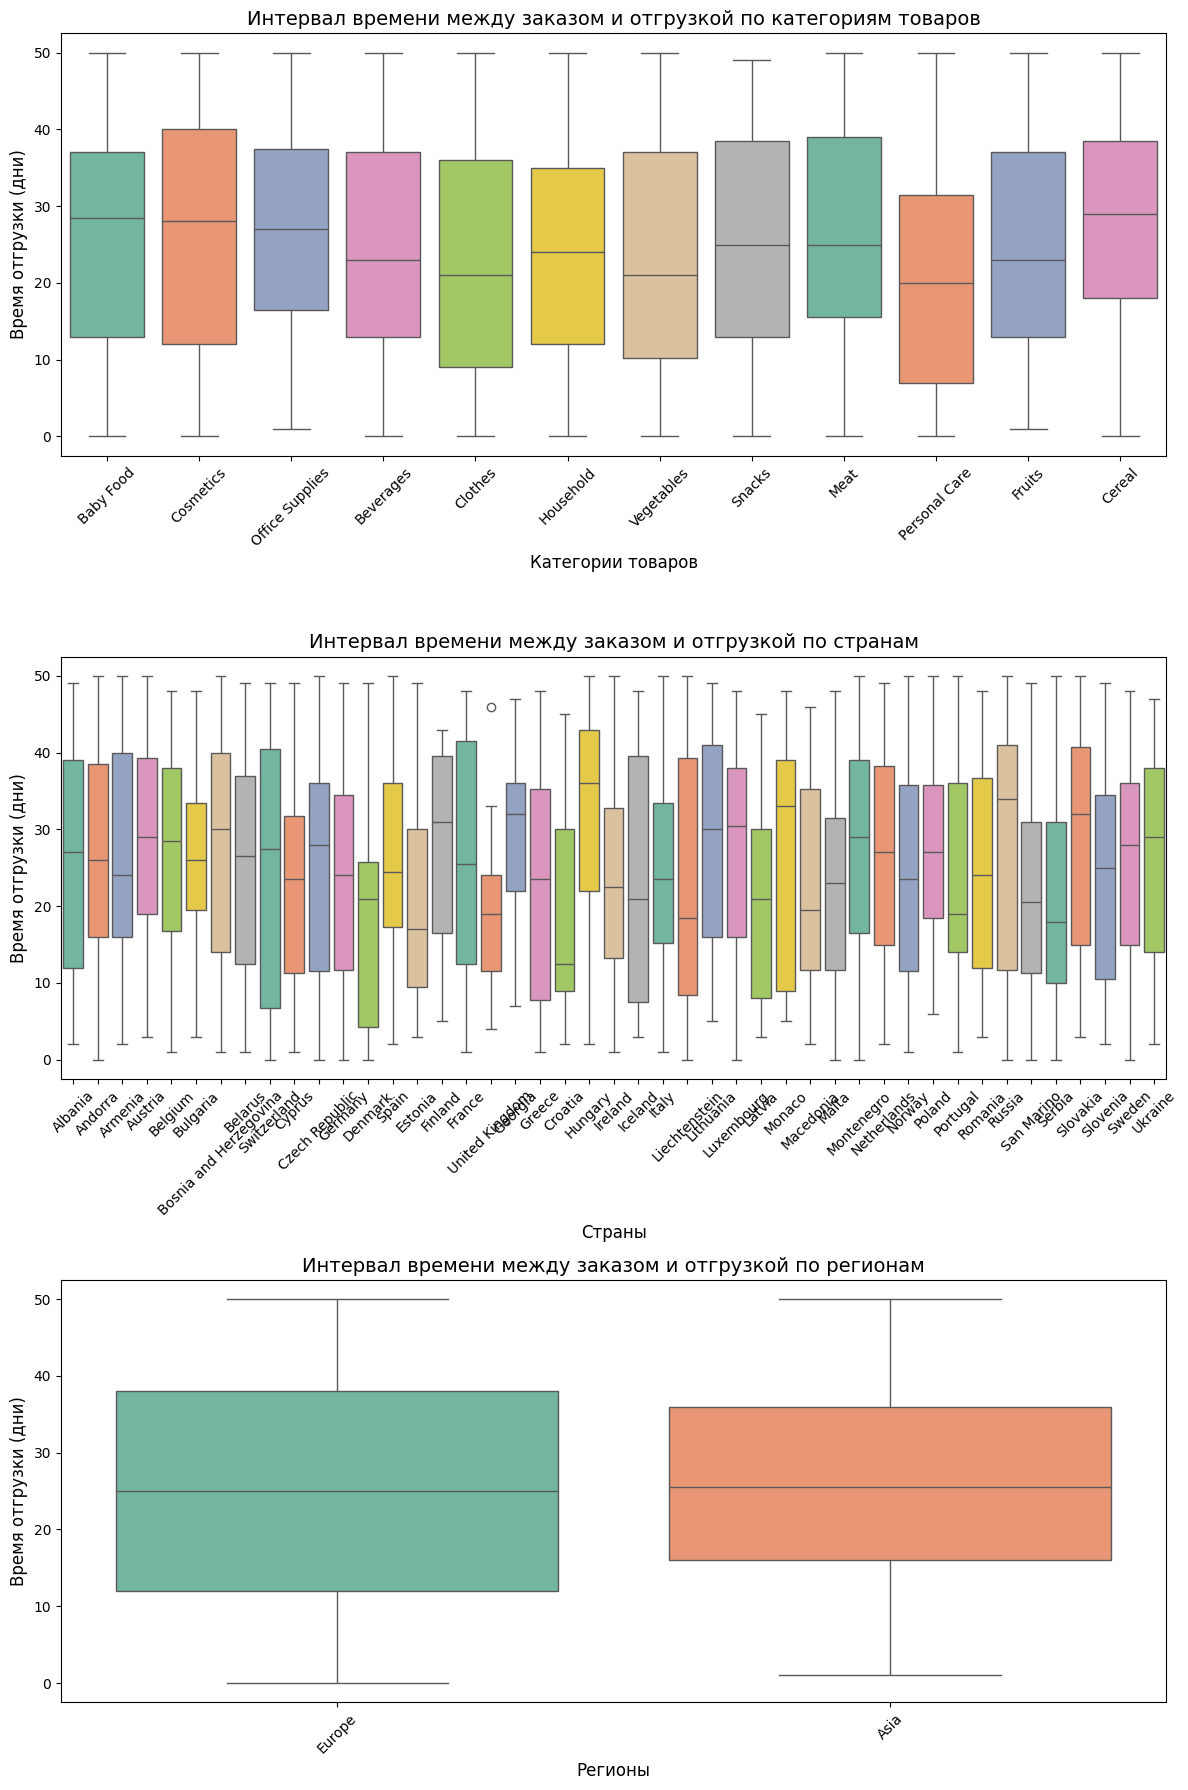

In [ ]:
df_combined['Shipping Time'] = (df_combined['Ship Date'] - df_combined['Order Date']).dt.days
fig, axes = plt.subplots(3, 1, figsize=(12, 18))

# 1. График для категорий товаров
sns.boxplot(x='item_type', y='Shipping Time', data=df_combined, palette="Set2", ax=axes[0])
axes[0].set_title("Интервал времени между заказом и отгрузкой по категориям товаров", fontsize=14)
axes[0].set_xlabel("Категории товаров", fontsize=12)
axes[0].set_ylabel("Время отгрузки (дни)", fontsize=12)
axes[0].tick_params(axis='x', rotation=45)

# 2. График для стран
sns.boxplot(x='Country', y='Shipping Time', data=df_combined, palette="Set2", ax=axes[1])
axes[1].set_title("Интервал времени между заказом и отгрузкой по странам", fontsize=14)
axes[1].set_xlabel("Страны", fontsize=12)
axes[1].set_ylabel("Время отгрузки (дни)", fontsize=12)
axes[1].tick_params(axis='x', rotation=45)

# 3. График для регионов
sns.boxplot(x='region', y='Shipping Time', data=df_combined, palette="Set2", ax=axes[2])
axes[2].set_title("Интервал времени между заказом и отгрузкой по регионам", fontsize=14)
axes[2].set_xlabel("Регионы", fontsize=12)
axes[2].set_ylabel("Время отгрузки (дни)", fontsize=12)
axes[2].tick_params(axis='x', rotation=45)


plt.tight_layout()
plt.show()

**Інтервал часу між замовленням та відвантаженням за категоріями товарів**

Можемо наблюдати що середній інтервал часу між замовленням та відвантаженням стабліьний для всіх категорій.Аномалій не бачимо. Також бачимо що коробка наших даних симетрична (верхня та нижня частини коробки приблизно однакові по довжині), це вказує на нормальний розподіл даних.


**Інтервал часу між замовленням та відвантаженням по країнах**

Бачимо що сердній час доставки для всіх країн разний, але більшість попадають від 20 до 30 днів.
Крайни у котрих верхня частина коробки більша (довший верхній хвіст)свідчити про те, що більшість доставок здійснюється швидко.
Це в нас Арменія, Іспанія, Єстонія, Франція, Хорватія, Лихтенштейн, Монака, Португалія, Сербія.

Інші потрапляють до списку нижня частина коробки більша (довший нижній хвіст),це може вказувати на те, що більшість замовлень мають відносно довгі терміни доставки.Можливо треба покращувати логістику.


**Інтервал часу між замовленням та відвантаженням по регіонах**


Середній показник доставки однаковий для двох регіонів.Європа потребує більше днів для доставки ніж Азія.



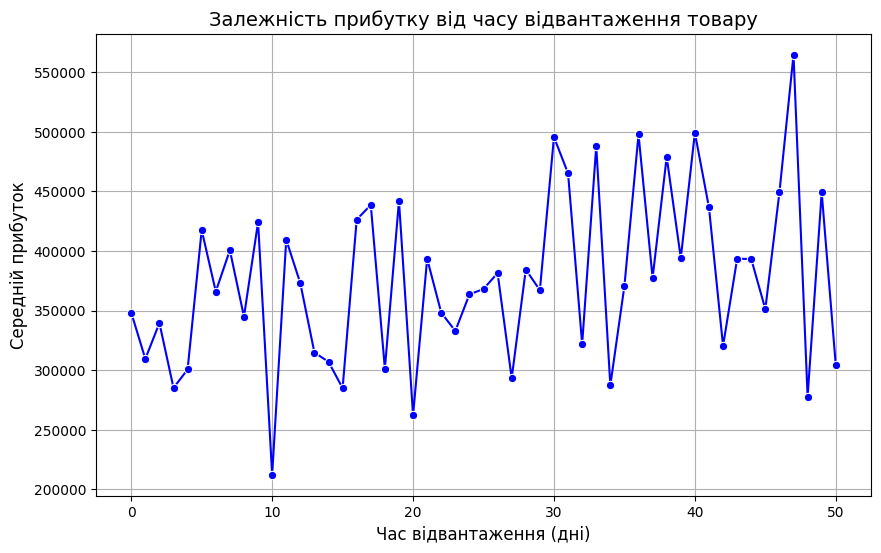

In [ ]:
# 1. Групування за інтервалом часу відвантаження (Shipping Time) і обчислення середнього прибутку
grouped_by_shipping_time = df_combined.groupby('Shipping Time')['Profit'].mean().reset_index()


# Побудова графіку
plt.figure(figsize=(10, 6))
sns.lineplot(x='Shipping Time', y='Profit', data=grouped_by_shipping_time, marker='o', color='blue')
plt.title("Залежність прибутку від часу відвантаження товару", fontsize=14)
plt.xlabel("Час відвантаження (дні)", fontsize=12)
plt.ylabel("Середній прибуток", fontsize=12)
plt.grid(True)
plt.show()


**Висновки:**

 Прибуток зростає із збільшенням часу доставки, це може вказувати на покращення бізнес-процесів. Це може бути пов'язано із зовнішніми факторами.Наприклад: свята чи зміна цін, тощо.




<ipython-input-63-3d47de879024>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Day of Week', y='Units Sold', data=sales_by_day_of_week, palette='Set2')


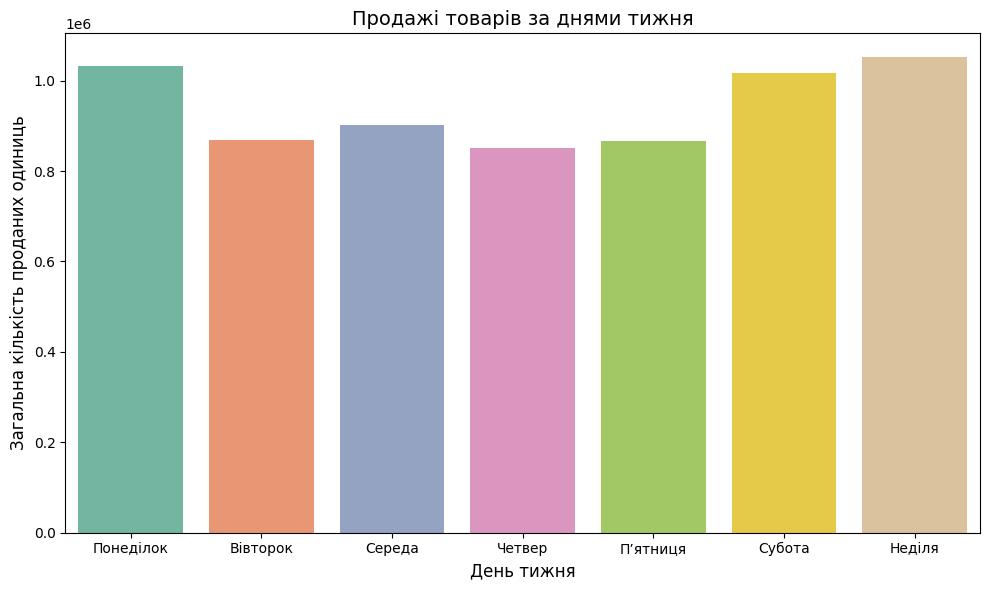

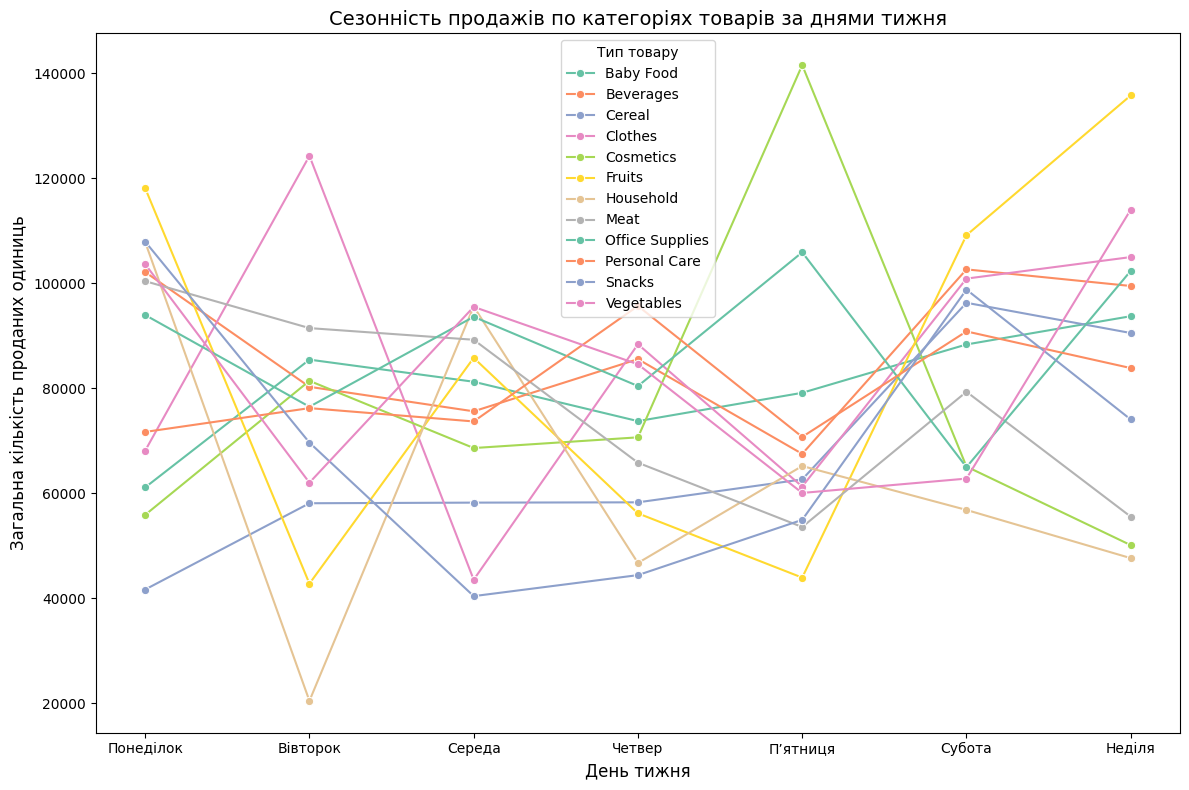

In [ ]:
# де 0 - понеділок, 6 - неділя
df_combined['Day of Week'] = df_combined['Order Date'].dt.weekday

# Групування по дням тижня
sales_by_day_of_week = df_combined.groupby('Day of Week')['Units Sold'].sum().reset_index()

# Візуалізація
plt.figure(figsize=(10, 6))
sns.barplot(x='Day of Week', y='Units Sold', data=sales_by_day_of_week, palette='Set2')
plt.title("Продажі товарів за днями тижня", fontsize=14)
plt.xlabel("День тижня", fontsize=12)
plt.ylabel("Загальна кількість проданих одиниць", fontsize=12)
plt.xticks(ticks=range(7), labels=["Понеділок", "Вівторок", "Середа", "Четвер", "П’ятниця", "Субота", "Неділя"])
plt.tight_layout()
plt.show()

# Аналіз сезонності товарів
sales_by_day_and_item = df_combined.groupby(['Day of Week', 'item_type'])['Units Sold'].sum().reset_index()

# Візуалізація сезонності по категоріях товарів
plt.figure(figsize=(12, 8))
sns.lineplot(x='Day of Week', y='Units Sold', hue='item_type', data=sales_by_day_and_item, marker='o', palette='Set2')
plt.title("Сезонність продажів по категоріях товарів за днями тижня", fontsize=14)
plt.xlabel("День тижня", fontsize=12)
plt.ylabel("Загальна кількість проданих одиниць", fontsize=12)
plt.xticks(ticks=range(7), labels=["Понеділок", "Вівторок", "Середа", "Четвер", "П’ятниця", "Субота", "Неділя"])
plt.legend(title='Тип товару')
plt.tight_layout()
plt.show()

Перший графік дозволяє зрозуміти що ціни загальні продажі є стабільними , підвищення їде с суботи, пік у неділю та ще у понеділок тримається цей рівен.
Другий графік дозволяє зрозуміти.
У п'ятницю великий попит був на косметику скоріш за все були знижки тому викликало такий великий скачок.Також можемо наблюдати схожу тенденцію для одягу у вівторок.
Середа, четвер та субота є стабільними для більшості категорій , виключенням у субота є фрукти бо вони починають взростати та їх пік випадає на неділю.